In [101]:
import numpy as np
import pandas as pd
import re
from enum import Enum
import matplotlib.pyplot as plt
from collections import Counter

In [102]:
#Load data from the csv file
data = np.loadtxt("./数据工程师 试题 - 识别degree - 数据-工作表1.csv", delimiter=",", dtype=str)

In [103]:
#Define the Enum class
#name: degrees
#value: list of corresponding re patterns

class MatchPatterns(Enum):
    MD = [r'Doctor of Medicine',r'(MD)',r'(M.D.)',r'^MD$',r'^M.D.$']
    PHD = [r'P\.?[Hh]\.?D',r'Doctor',r'博士']
    MASTER = [r'[Mm]aster',r'硕士',r'碩士']
    BACHELOR = [r'[bB]achelor',r'本科',r'学士',r'^B\.?[SAE]']
    ASSOCIATE = [r'[aA]ssociate',r'[aA]ss']
    HIGH_SCHOOL = [r'[hH]igh [sS]chool']


In [104]:
#Function for checking which level of degree the str indicates
#Takes two parameter: the string and the matchpattern in enum type
#Returns the degree level or empty string if not recognized

def match_degree(str, match_patterns):
    for match_pattern in match_patterns:
        name = match_pattern.name
        patterns = match_pattern.value
        if any(re.search(pattern, str) for pattern in patterns):
            return name
    return ''

In [105]:
#Generate the degree pattern matching result on the target data
#Stored in list 'result'

result = []
for x in data:
    result.append(match_degree(x ,MatchPatterns))

In [106]:
#Merge the orriginal data and degree matching result as dataframe
#Output as .csv file

result_fileformat = pd.DataFrame({'data':data,'result':result})
filename = "Result.csv"
result_fileformat.to_csv(filename, index=False, header=False)

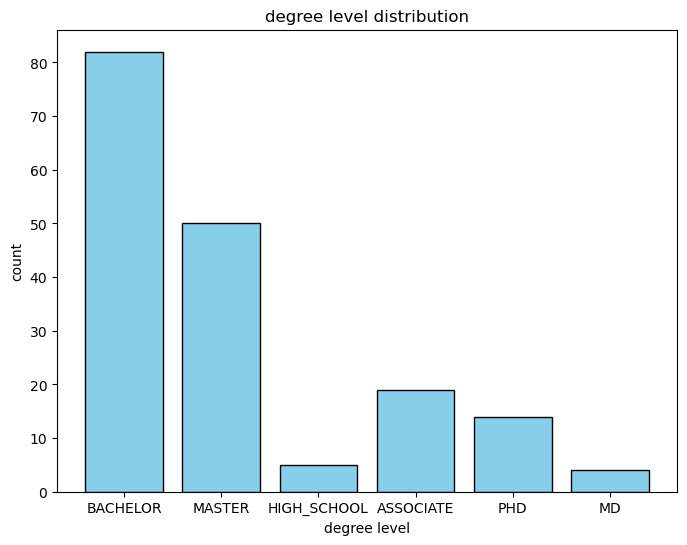

In [107]:
#visualize using plt

counts = Counter(filter(lambda x: x.strip() != '', result))
categories = list(counts.keys())
values = list(counts.values())

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='skyblue', edgecolor='black')

plt.title('degree level distribution')
plt.xlabel('degree level')
plt.ylabel('count')
plt.show()